# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("pancan_EGFR_pearson.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#filtered_data = df[df["Comparison"]== "ARG1"]
df= df.dropna(thresh = 14)
df["SD_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
#df["Average_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))
#df["SD_Pval"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
#df["Average_Pval"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)

#df = df.drop([0])
df

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Endo,P_value_Endo,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,SD_Correlation
0,EGFR_proteomics,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,1.186878e-16
1,GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.437336,0.000009,-0.190090,0.085202,-0.177379,0.057899,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,-0.174810,6.776395e-02,2.356400e-01
3,SHC1_proteomics,-0.540524,7.695118e-09,-0.102065,0.288685,-0.208383,0.042716,0.175098,0.113358,0.090908,0.333927,-0.135844,0.262164,-0.085910,3.744159e-01,0.203250,0.045855,0.123922,1.971088e-01,2.434330e-01
4,WAS_proteomics,-0.501918,1.205168e-07,-0.279814,0.003071,-0.238306,0.020041,-0.090413,0.416288,0.153496,0.101463,-0.337909,0.000306,-0.503427,2.411333e-08,0.282401,0.005070,-0.177954,6.289182e-02,2.868968e-01
5,NPC2_proteomics,-0.498791,1.484249e-07,-0.319133,0.000678,0.026214,0.800915,-0.183193,0.097375,0.279599,0.002476,0.292520,0.001928,-0.073050,4.503201e-01,0.040840,0.691234,-0.013310,8.902375e-01,2.743765e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,LAMA3_proteomics,NaN,NaN,0.026510,0.783381,-0.009692,0.925734,0.280294,0.010272,0.065620,0.485955,-0.291187,0.002027,0.240877,1.163259e-02,0.315727,0.001631,0.211879,2.627535e-02,2.112718e-01
1209,ZFP36_proteomics,NaN,NaN,0.035245,0.814060,-0.284847,0.052302,NaN,NaN,0.205473,0.033739,-0.299990,0.002983,0.129523,1.794886e-01,0.104687,0.307497,0.005728,9.537562e-01,1.765128e-01
1213,LAMB3_proteomics,NaN,NaN,-0.032217,0.827914,-0.011152,0.914581,0.324377,0.002774,0.394351,0.000013,-0.153787,0.108699,0.373225,6.412704e-05,0.195785,0.054618,0.492286,4.697496e-08,2.388899e-01
1215,MAP4K1_proteomics,NaN,NaN,-0.024209,0.855579,-0.008992,0.935696,-0.326826,0.003957,0.080551,0.405053,-0.377548,0.000048,-0.423254,4.531560e-06,NaN,NaN,-0.264277,5.272744e-03,2.040244e-01


In [3]:
df = df.set_index('Comparison')

In [4]:
df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Endo,P_value_Endo,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,SD_Correlation
Comparison,,,,,,,,,,,,,,,,,,,
EGFR_proteomics,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,1.186878e-16
GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.437336,0.000009,-0.190090,0.085202,-0.177379,0.057899,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,-0.174810,6.776395e-02,2.356400e-01
SHC1_proteomics,-0.540524,7.695118e-09,-0.102065,0.288685,-0.208383,0.042716,0.175098,0.113358,0.090908,0.333927,-0.135844,0.262164,-0.085910,3.744159e-01,0.203250,0.045855,0.123922,1.971088e-01,2.434330e-01
WAS_proteomics,-0.501918,1.205168e-07,-0.279814,0.003071,-0.238306,0.020041,-0.090413,0.416288,0.153496,0.101463,-0.337909,0.000306,-0.503427,2.411333e-08,0.282401,0.005070,-0.177954,6.289182e-02,2.868968e-01
NPC2_proteomics,-0.498791,1.484249e-07,-0.319133,0.000678,0.026214,0.800915,-0.183193,0.097375,0.279599,0.002476,0.292520,0.001928,-0.073050,4.503201e-01,0.040840,0.691234,-0.013310,8.902375e-01,2.743765e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAMA3_proteomics,NaN,NaN,0.026510,0.783381,-0.009692,0.925734,0.280294,0.010272,0.065620,0.485955,-0.291187,0.002027,0.240877,1.163259e-02,0.315727,0.001631,0.211879,2.627535e-02,2.112718e-01
ZFP36_proteomics,NaN,NaN,0.035245,0.814060,-0.284847,0.052302,NaN,NaN,0.205473,0.033739,-0.299990,0.002983,0.129523,1.794886e-01,0.104687,0.307497,0.005728,9.537562e-01,1.765128e-01
LAMB3_proteomics,NaN,NaN,-0.032217,0.827914,-0.011152,0.914581,0.324377,0.002774,0.394351,0.000013,-0.153787,0.108699,0.373225,6.412704e-05,0.195785,0.054618,0.492286,4.697496e-08,2.388899e-01


In [5]:
df1_subset = df[["Average_Pval","SD_Pval"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["Average_Pval"]].values
y1 = df1_subset[["SD_Pval"]].values
x1 = x1[:,0]
y1 = y1[:,0]
plt.hist2d(x1,y1,bins=50)
plt.title("Average P value vs SD P value")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')


KeyError: "None of [Index(['Average_Pval', 'SD_Pval'], dtype='object')] are in the [columns]"

In [ ]:
g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()
g.savefig("Step3C_Pval_EGFR.png")

Text(0.5, 1.0, 'Average Correlation vs SD Correlation')

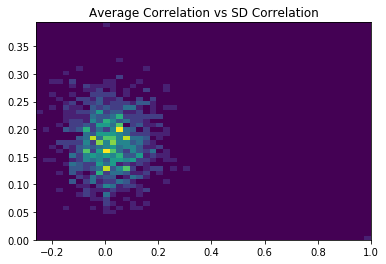

In [5]:
df1_subset = df[["Average_Correlation","SD_Correlation"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["Average_Correlation"]].values
y1 = df1_subset[["SD_Correlation"]].values
x1 = x1[:,0]
y1 = y1[:,0]
plt.hist2d(x1,y1,bins=50)
plt.title("Average Correlation vs SD Correlation")


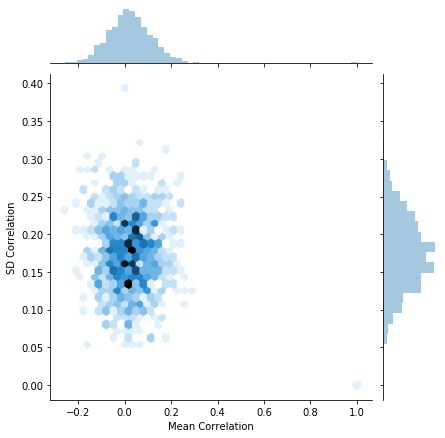

In [6]:
g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("Mean Correlation", "SD Correlation"))

plt.show()
g.savefig("Step3C_corr_EGFR.png")

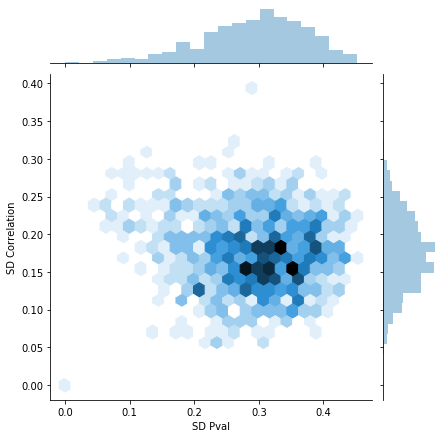

In [7]:
df1_subset = df[["SD_Pval","SD_Correlation"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["SD_Pval"]].values
y1 = df1_subset[["SD_Correlation"]].values
x1 = x1[:,0]
y1 = y1[:,0]

g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("SD Pval", "SD Correlation"))

plt.show()


In [3]:
#pd.set_option('display.max_columns', 25)
df = df.set_index('Comparison')
pathway = ["NRAS_proteomics","KRAS_proteomics","HRAS_proteomics","RASGRP2_proteomics","RAF1_proteomics","MAP3K1_proteomics","MAP3K2_proteomics","MAPK1_proteomics","MAPK3_proteomics"]


#MapKinase.to_csv(r'/Users/Lindsey/Documents/MapKinase2.csv')

In [5]:
#df.loc[df['Comparison'] == "KRAS_proteomics"]
#df = df.drop(columns=['Correlation_Endo', 'P_value_Endo']) # drop less freq EGFR mutation cancers
#df = df.drop(columns=['Average_Correlation', 'SD_Pval',"Average_Pval","SD_Correlation"])
#pd.set_option("display.precision", 3)
df1_transposed = df.T # or df1.transpose()
#MapKinase = df1_transposed[pathway]
df1_transposed
#MapKinase

Comparison,EGFR_proteomics,GRB2_proteomics,SHC1_proteomics,WAS_proteomics,NPC2_proteomics,IKBKE_proteomics,CTSB_proteomics,SOX9_proteomics,PPP2R3A_proteomics,COL6A2_proteomics,...,COL2A1_proteomics,CD209_proteomics,MAP3K8_proteomics,ITGA11_proteomics,GPX2_proteomics,LAMA3_proteomics,ZFP36_proteomics,LAMB3_proteomics,MAP4K1_proteomics,GNG10_proteomics
Correlation_Gbm,1.000000e+00,-6.108891e-01,-5.405245e-01,-5.019180e-01,-4.987906e-01,-5.197345e-01,-4.968953e-01,4.906701e-01,-5.037773e-01,-4.827741e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_value_Gbm,0.000000e+00,1.886384e-11,7.695118e-09,1.205168e-07,1.484249e-07,1.525615e-07,1.682242e-07,2.524741e-07,4.157858e-07,4.177381e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Correlation_kidney,1.000000e+00,-2.174268e-01,-1.020648e-01,-2.798139e-01,-3.191335e-01,6.043326e-02,-2.263099e-01,6.918633e-03,2.857350e-01,2.288086e-01,...,-0.079021,-0.067331,-0.086107,-0.052775,0.053646,0.026510,0.035245,-3.221695e-02,-0.024209,-0.001988
P_value_kidney,0.000000e+00,2.250643e-02,2.886854e-01,3.070750e-03,6.783668e-04,7.383175e-01,1.743635e-02,9.611753e-01,2.478699e-03,1.620173e-02,...,0.444091,0.501334,0.564957,0.743136,0.749062,0.783381,0.814060,8.279136e-01,0.855579,0.983552
Correlation_Endo,1.000000e+00,-4.373359e-01,-2.083825e-01,-2.383056e-01,2.621397e-02,-1.943371e-01,7.179313e-02,2.116198e-01,6.181955e-02,2.430062e-01,...,0.010921,0.007584,-0.112536,0.019631,0.019047,-0.009692,-0.284847,-1.115221e-02,-0.008992,NaN
P_value_Endo,0.000000e+00,9.358121e-06,4.271583e-02,2.004107e-02,8.009150e-01,9.034205e-02,4.893253e-01,4.650252e-02,5.517529e-01,1.765087e-02,...,0.916345,0.945752,0.350103,0.850228,0.854636,0.925734,0.052302,9.145806e-01,0.935696,NaN
Correlation_Ovar,1.000000e+00,-1.900897e-01,1.750975e-01,-9.041309e-02,-1.831929e-01,1.282507e-01,-3.321077e-02,9.605410e-02,1.038304e-01,1.700106e-01,...,0.232207,0.279752,0.292158,-0.037524,-0.219369,0.280294,NaN,3.243775e-01,-0.326826,-0.080171
P_value_Ovar,0.000000e+00,8.520228e-02,1.133577e-01,4.162884e-01,9.737460e-02,2.478946e-01,7.656588e-01,3.876852e-01,3.502411e-01,1.243938e-01,...,0.034653,0.010426,0.010440,0.736273,0.179662,0.010272,NaN,2.773881e-03,0.003957,0.471231
Correlation_Brca,1.000000e+00,-1.773788e-01,9.090809e-02,1.534960e-01,2.795993e-01,1.199723e-01,3.410479e-01,2.529196e-01,4.461368e-01,1.580210e-01,...,-0.063834,0.282232,0.007177,0.126626,NaN,0.065620,0.205473,3.943511e-01,0.080551,0.061879
P_value_Brca,0.000000e+00,5.789878e-02,3.339275e-01,1.014634e-01,2.476401e-03,2.015588e-01,1.915971e-04,6.389000e-03,5.820667e-07,1.007775e-01,...,0.497926,0.004442,0.939316,0.177493,NaN,0.485955,0.033739,1.295748e-05,0.405053,0.511206


In [27]:
df1_transposed.filter(like='ITGB1', axis=1)

Comparison,ITGB1_proteomics
Correlation_Gbm,-4.123639e-01
P_value_Gbm,2.223482e-05
Correlation_kidney,2.760275e-01
P_value_kidney,3.513143e-03
Correlation_Endo,5.949754e-01
P_value_Endo,2.041718e-10
Correlation_Ovar,2.774720e-01
P_value_Ovar,1.109692e-02
Correlation_Brca,4.105299e-01
P_value_Brca,5.191577e-06


In [8]:
#df.loc[df['Comparison'] == "KRAS_proteomics"]
#df = df.drop(columns=['Correlation_Endo', 'P_value_Endo']) # drop less freq EGFR mutation cancers
#df = df.drop(columns=['Average_Correlation', 'SD_Pval',"Average_Pval","SD_Correlation"])
#pd.set_option("display.precision", 3)
#df1_transposed = df.T # or df1.transpose()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pathway2 = ["CBL_proteomics","VAV1_proteomics","RAC1_proteomics","PAK1_proteomics","MAP3K1_proteomics","MAP2K4_proteomics","MAP2K7_proteomics","MAPK1_proteomics","MAPK7_proteomics","NCK1_proteomics"]
pathway1 = ["GRB2_proteomics", "SHC1_proteomics","SOS1_proteomics","HRAS_proteomics","NRAS_proteomics","KRAS_proteomics","RASGRP2_proteomics"]

pathway2 = df1_transposed[pathway1]

pathway2

KeyError: "['HBEGF_proteomics'] not in index"

In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pathway2 = ["STAT1_proteomics","JAK1_proteomics","JAK2_proteomics","STAT3_proteomics","SRC_proteomics"]

pathway2 = df1_transposed[pathway2]

pathway2

Comparison,STAT1_proteomics,JAK1_proteomics,JAK2_proteomics,STAT3_proteomics,SRC_proteomics
Correlation_Gbm,0.231,9.096e-02,-0.169,-0.042,8.643e-02
P_value_Gbm,0.021,3.706e-01,0.095,0.683,3.950e-01
Correlation_kidney,-0.070,9.447e-02,-0.235,-0.075,-1.890e-01
P_value_kidney,0.465,3.263e-01,0.014,0.688,4.803e-02
Correlation_Ovar,-0.144,-3.466e-02,0.064,0.119,-4.705e-02
P_value_Ovar,0.193,7.558e-01,0.694,0.285,6.728e-01
Correlation_Brca,0.069,-1.379e-01,0.142,-0.133,2.841e-01
P_value_Brca,0.463,1.417e-01,0.142,0.171,2.088e-03
Correlation_Luad,0.018,-1.576e-01,-0.188,-0.112,-1.162e-01
P_value_Luad,0.852,1.001e-01,0.049,0.244,2.266e-01


In [57]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pathwayAKT = ["PIP5K1C_proteomics","PIP5K1A_proteomics","PDPK1_proteomics","AKT1_proteomics","AKT2_proteomics","AKT3_proteomics","MTOR_proteomics","TP53_proteomics","CASP3_proteomics","CASP7_proteomics","CASP9_proteomics","CASP8_proteomics"]

pathwayAKTdf = df1_transposed[pathwayAKT]

pathwayAKTdf


Comparison,PIP5K1C_proteomics,PIP5K1A_proteomics,PDPK1_proteomics,AKT1_proteomics,AKT2_proteomics,AKT3_proteomics,MTOR_proteomics,TP53_proteomics,CASP3_proteomics,CASP7_proteomics,CASP9_proteomics,CASP8_proteomics
Correlation_Gbm,0.239,0.041,-0.125,0.078,0.210,-7.373e-02,0.204,-0.246,0.246,-3.380e-01,-5.809e-02,-0.312
P_value_Gbm,0.017,0.684,0.216,0.441,0.037,4.683e-01,0.042,0.036,0.014,6.230e-04,5.679e-01,0.002
Correlation_kidney,-0.111,-0.069,0.177,0.034,0.111,-7.967e-02,-0.155,-0.072,-0.199,6.022e-02,8.118e-02,NaN
P_value_kidney,0.249,0.480,0.064,0.721,0.246,4.080e-01,0.106,0.711,0.037,5.320e-01,3.992e-01,NaN
Correlation_Ovar,-0.014,-0.022,0.067,-0.101,-0.146,-1.180e-01,-0.109,-0.070,-0.319,4.202e-02,-3.719e-01,-0.140
P_value_Ovar,0.901,0.842,0.545,0.363,0.188,2.882e-01,0.327,0.531,0.003,7.061e-01,9.401e-04,0.207
Correlation_Brca,0.116,NaN,-0.254,-0.131,-0.095,3.070e-01,-0.125,0.190,0.097,-7.037e-02,-1.092e-01,0.090
P_value_Brca,0.216,NaN,0.006,0.164,0.311,8.461e-04,0.184,0.042,0.304,4.549e-01,2.455e-01,0.338
Correlation_Luad,-0.121,-0.191,NaN,0.045,0.058,-2.595e-01,NaN,0.022,-0.051,-3.039e-03,-9.008e-03,0.079
P_value_Luad,0.207,0.046,NaN,0.644,0.548,6.194e-03,NaN,0.844,0.599,9.749e-01,9.256e-01,0.568


In [12]:

# boolean series returned with False at place of NaN 
bool_series = df["Comparison"].str.startswith("VAV1", na = False) 
  
# displaying filtered dataframe 
df[bool_series] 

KeyError: 'Comparison'

In [ ]:
#df["ranking_slope+pvalue"] = df1_merged1["ranking_slope"] + df1_merged1["ranking_pvalue"]
#df1_merged1.nlargest(20,"ranking_slope+pvalue")


In [ ]:
brain = cptac.Gbm()

In [ ]:
prot = brain.get_proteomics()
prot_list = prot.columns.values.tolist()
prot_list
for item in prot_list:
    if item.startswith('PAK'):
        print(item)


In [ ]:
df.hist(column='SD_Correlation', bins = 50)

In [ ]:
df_slope.hist(column='mean', bins = 50)

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Histogram of SD of the Slopes from Regression Plots for Interacting EGFR Trans Effects')

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100).set_title('Histogram of Mean of the Slope from Regression Plots for interacting EGFR and Trans Effects')

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_pvalue["SD"], bins = 100).set_title('Histogram of SD of the P_value from Regression Plots for Interacting EGFR Trans Effects')

In [ ]:
df_other = pd.read_csv('pancan_EGFR_other.csv')
df_other = df_other.drop(['Unnamed: 0'], axis=1)
df_other

In [ ]:
df_pvalue_other = df_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue_other= df_pvalue_other.dropna(thresh = 6)
df_pvalue_other["SD_other"] = (df_pvalue_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged =  pd.concat([df_pvalue, df_pvalue_other], axis=1, sort=False)
merged

In [ ]:
# Method 1: on the same Axis
sns.distplot( merged["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of pvalues for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')



In [ ]:
df_slope_other = df_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope_other= df_slope_other.dropna(thresh = 6)
df_slope_other["SD_other"] = (df_slope_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_slope_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged2 =  pd.concat([df_slope, df_slope_other], axis=1, sort=False)
merged2

In [ ]:
# Method 1: on the same Axis
sns.distplot( merged2["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged2["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of Correlation for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')